In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import astro_parser
import numpy as np

plt.style.use("presentation")

In [3]:
df = astro_parser.main()

In [4]:
authorship, tally, rank = astro_parser.time_analysis(df)

/home/kelvin/Dropbox (Smithsonian External)/Projects/Astrochymist/astro_parser.py:137: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  rank_df.to_csv("author_ranking.csv")


In [5]:
df.loc[df["Year"] == 1975]

,Year,Molecule,Authors,Source,Detection Method
31,1975,CH2CHCNvinylcyanide,"[F Gardner, G Winnewisser]",Sgr B2,[Radio]
32,1975,CH3CH2OHethanol,"[B Zuckerman, E Turner, R Johnson, O Clark, J ...",Sgr B2,[Radio]
33,1975,HCOOCH3methyl formate,"[D Brown, G Crofts, D Godfrey, F Gardner, J Ro...",cis isomer: Sgr B2,[Radio]
34,1975,SO2sulfur dioxide,"[E Snyder, M Hollis, L Ulich, J Lovas, D Buhl,...",Orion A,[Radio]
35,1975,SiSsilicon monosulfide,"[M Morris, W Gilmore, P Palmer, E Turner, B Zu...",IRC +10216,[Radio]
36,1975,NSnitrogen monosulfide,"[A Gottlieb, A Ball, W Gottlieb, J Lada, H Pen...",Sgr B2,[Radio]
37,1975,NH2CNcyanamide,"[E Turner, S Liszt, N Kaifu, G Kisliakov]",Sgr B2,[Radio]


In [13]:
top_10_people = rank.head(10).index

In [14]:
top_10_people

Index(['J Cernicharo', 'M Guélin', 'P Thaddeus', 'A Gottlieb', 'M Agúndez',
       'M Hollis', 'J Lovas', 'C McCarthy', 'M Ziurys', 'E Snyder'],
      dtype='object')

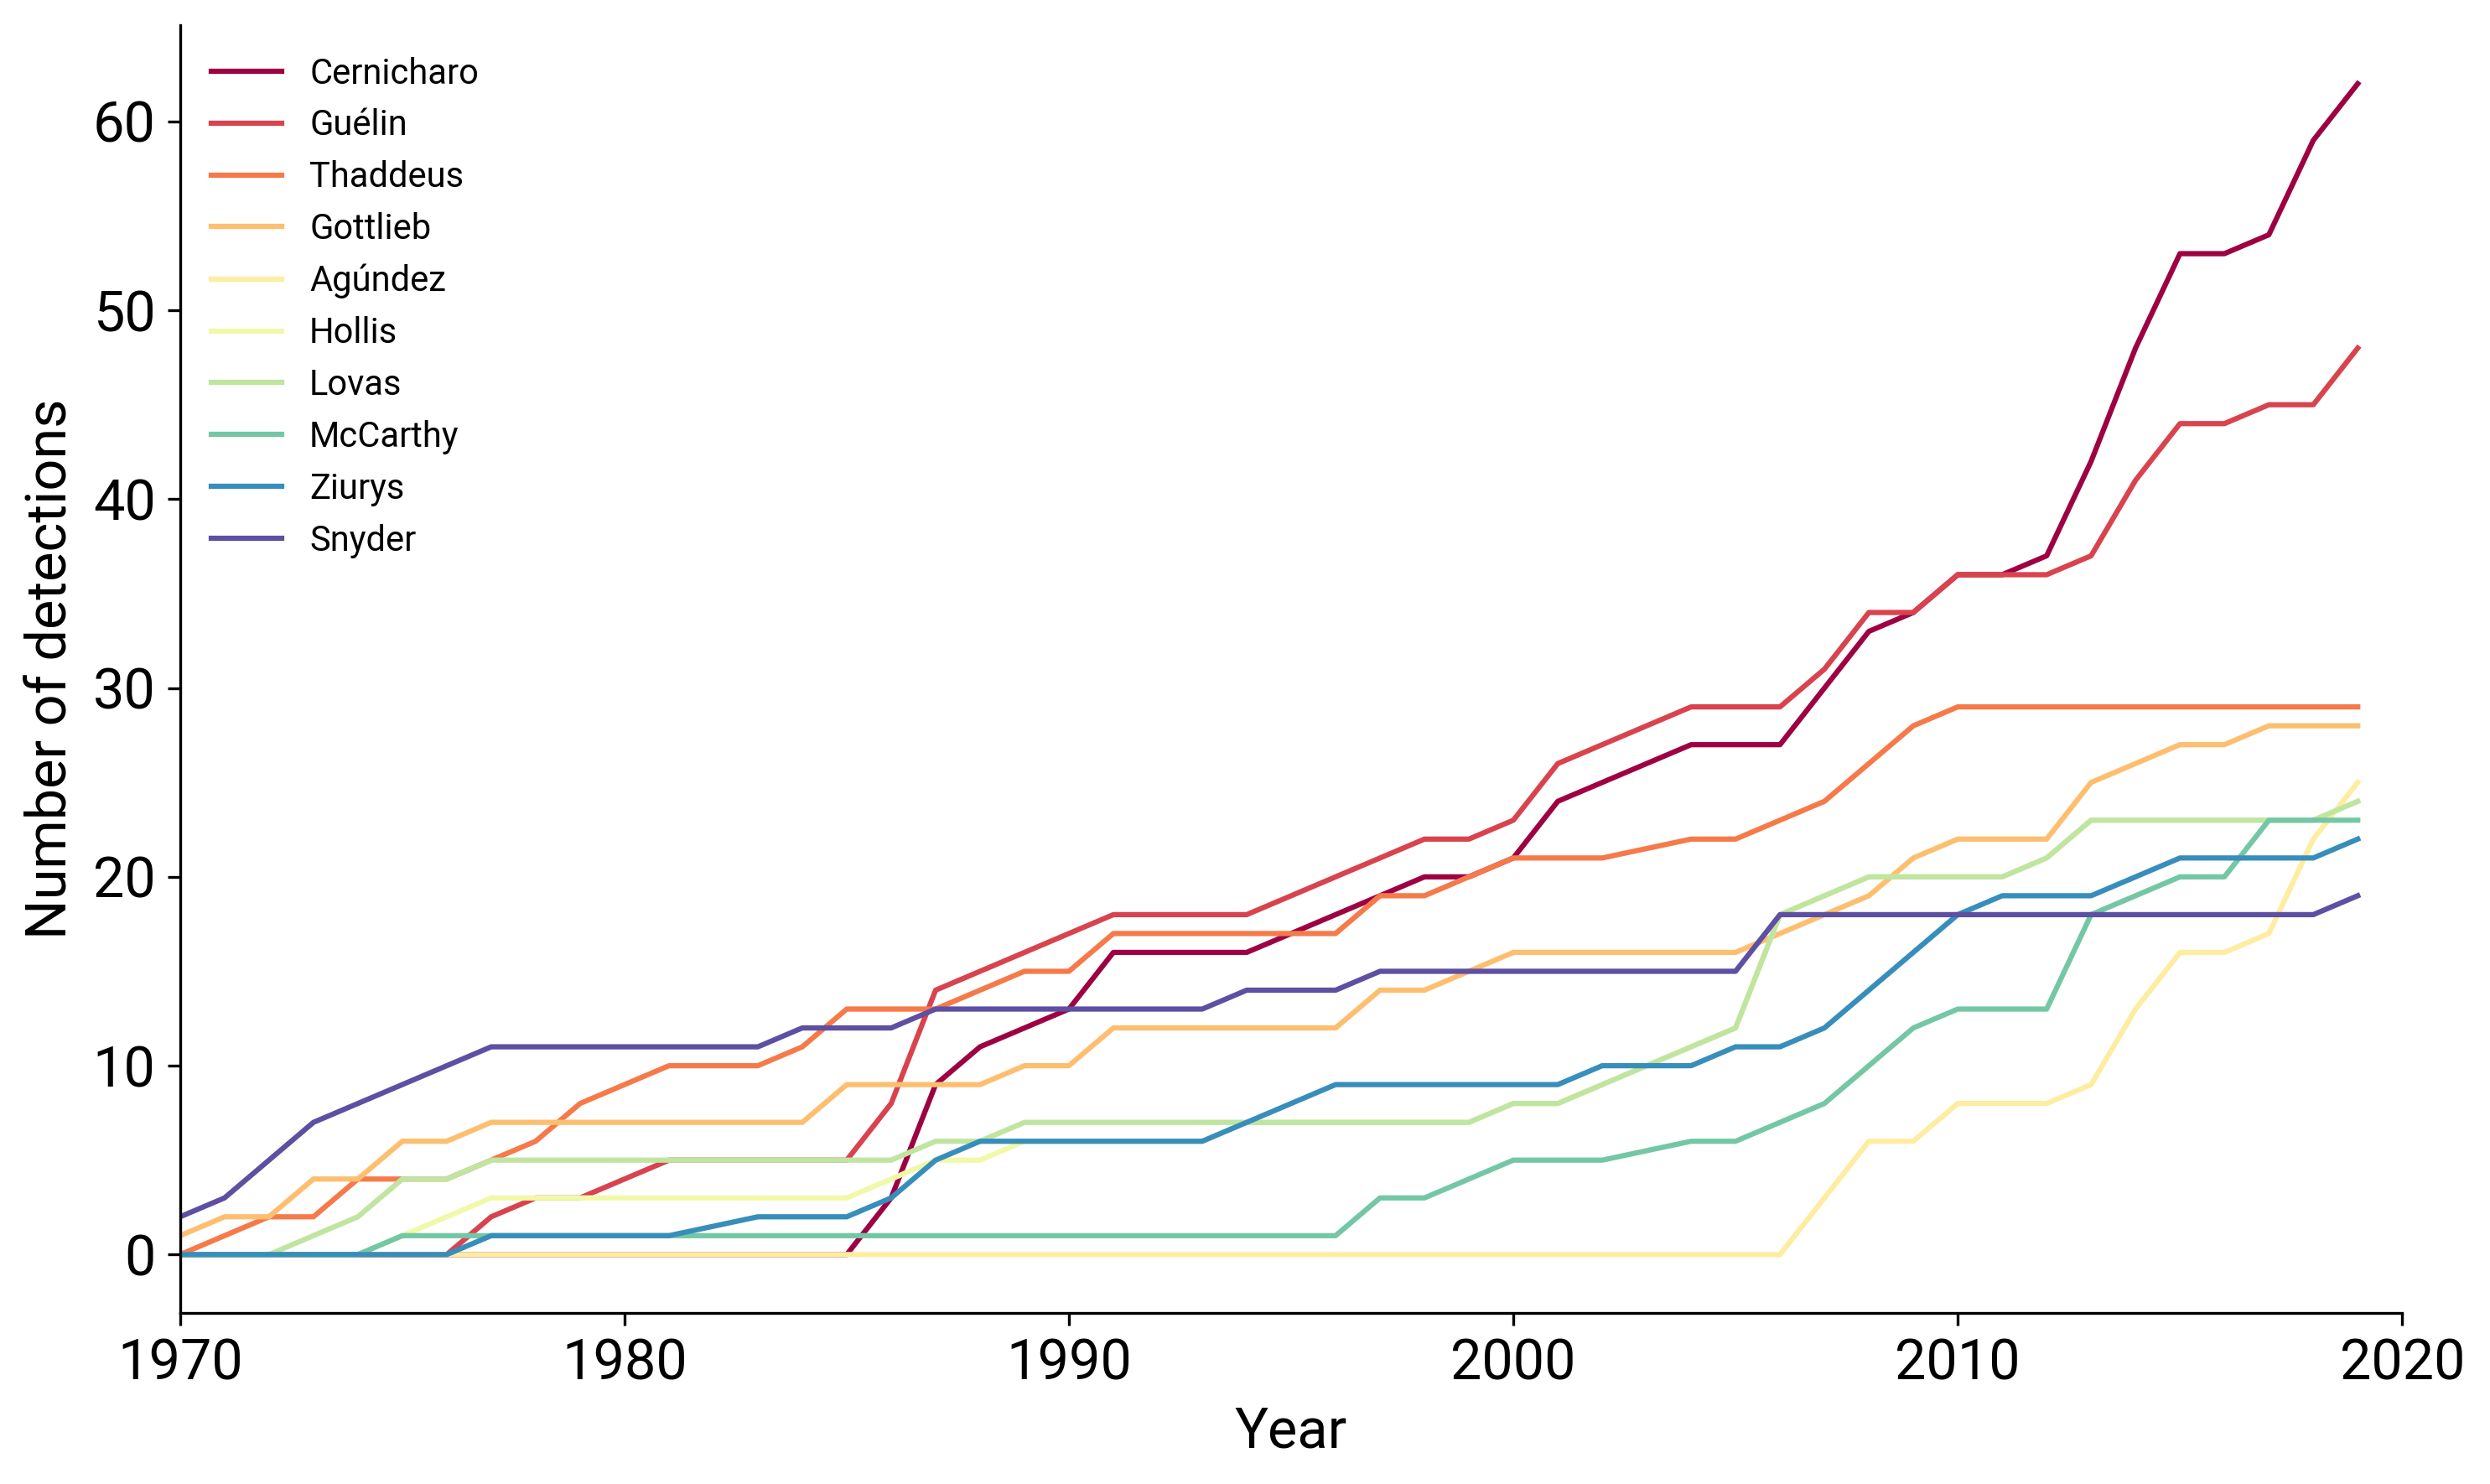

In [22]:
fig, ax = plt.subplots()

colors = plt.cm.Spectral(np.linspace(0., 1., 10))

for person, color in zip(top_10_people, colors):
    ax.plot(
        tally.index, tally[person], label=person.split()[-1], color=color
    )
ax.set_xlim([1970., 2020])
ax.legend(loc="best")

ax.set_xlabel("Year")
ax.set_ylabel("Number of detections")
fig.tight_layout()
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
fig.savefig("people.png", dpi=300)

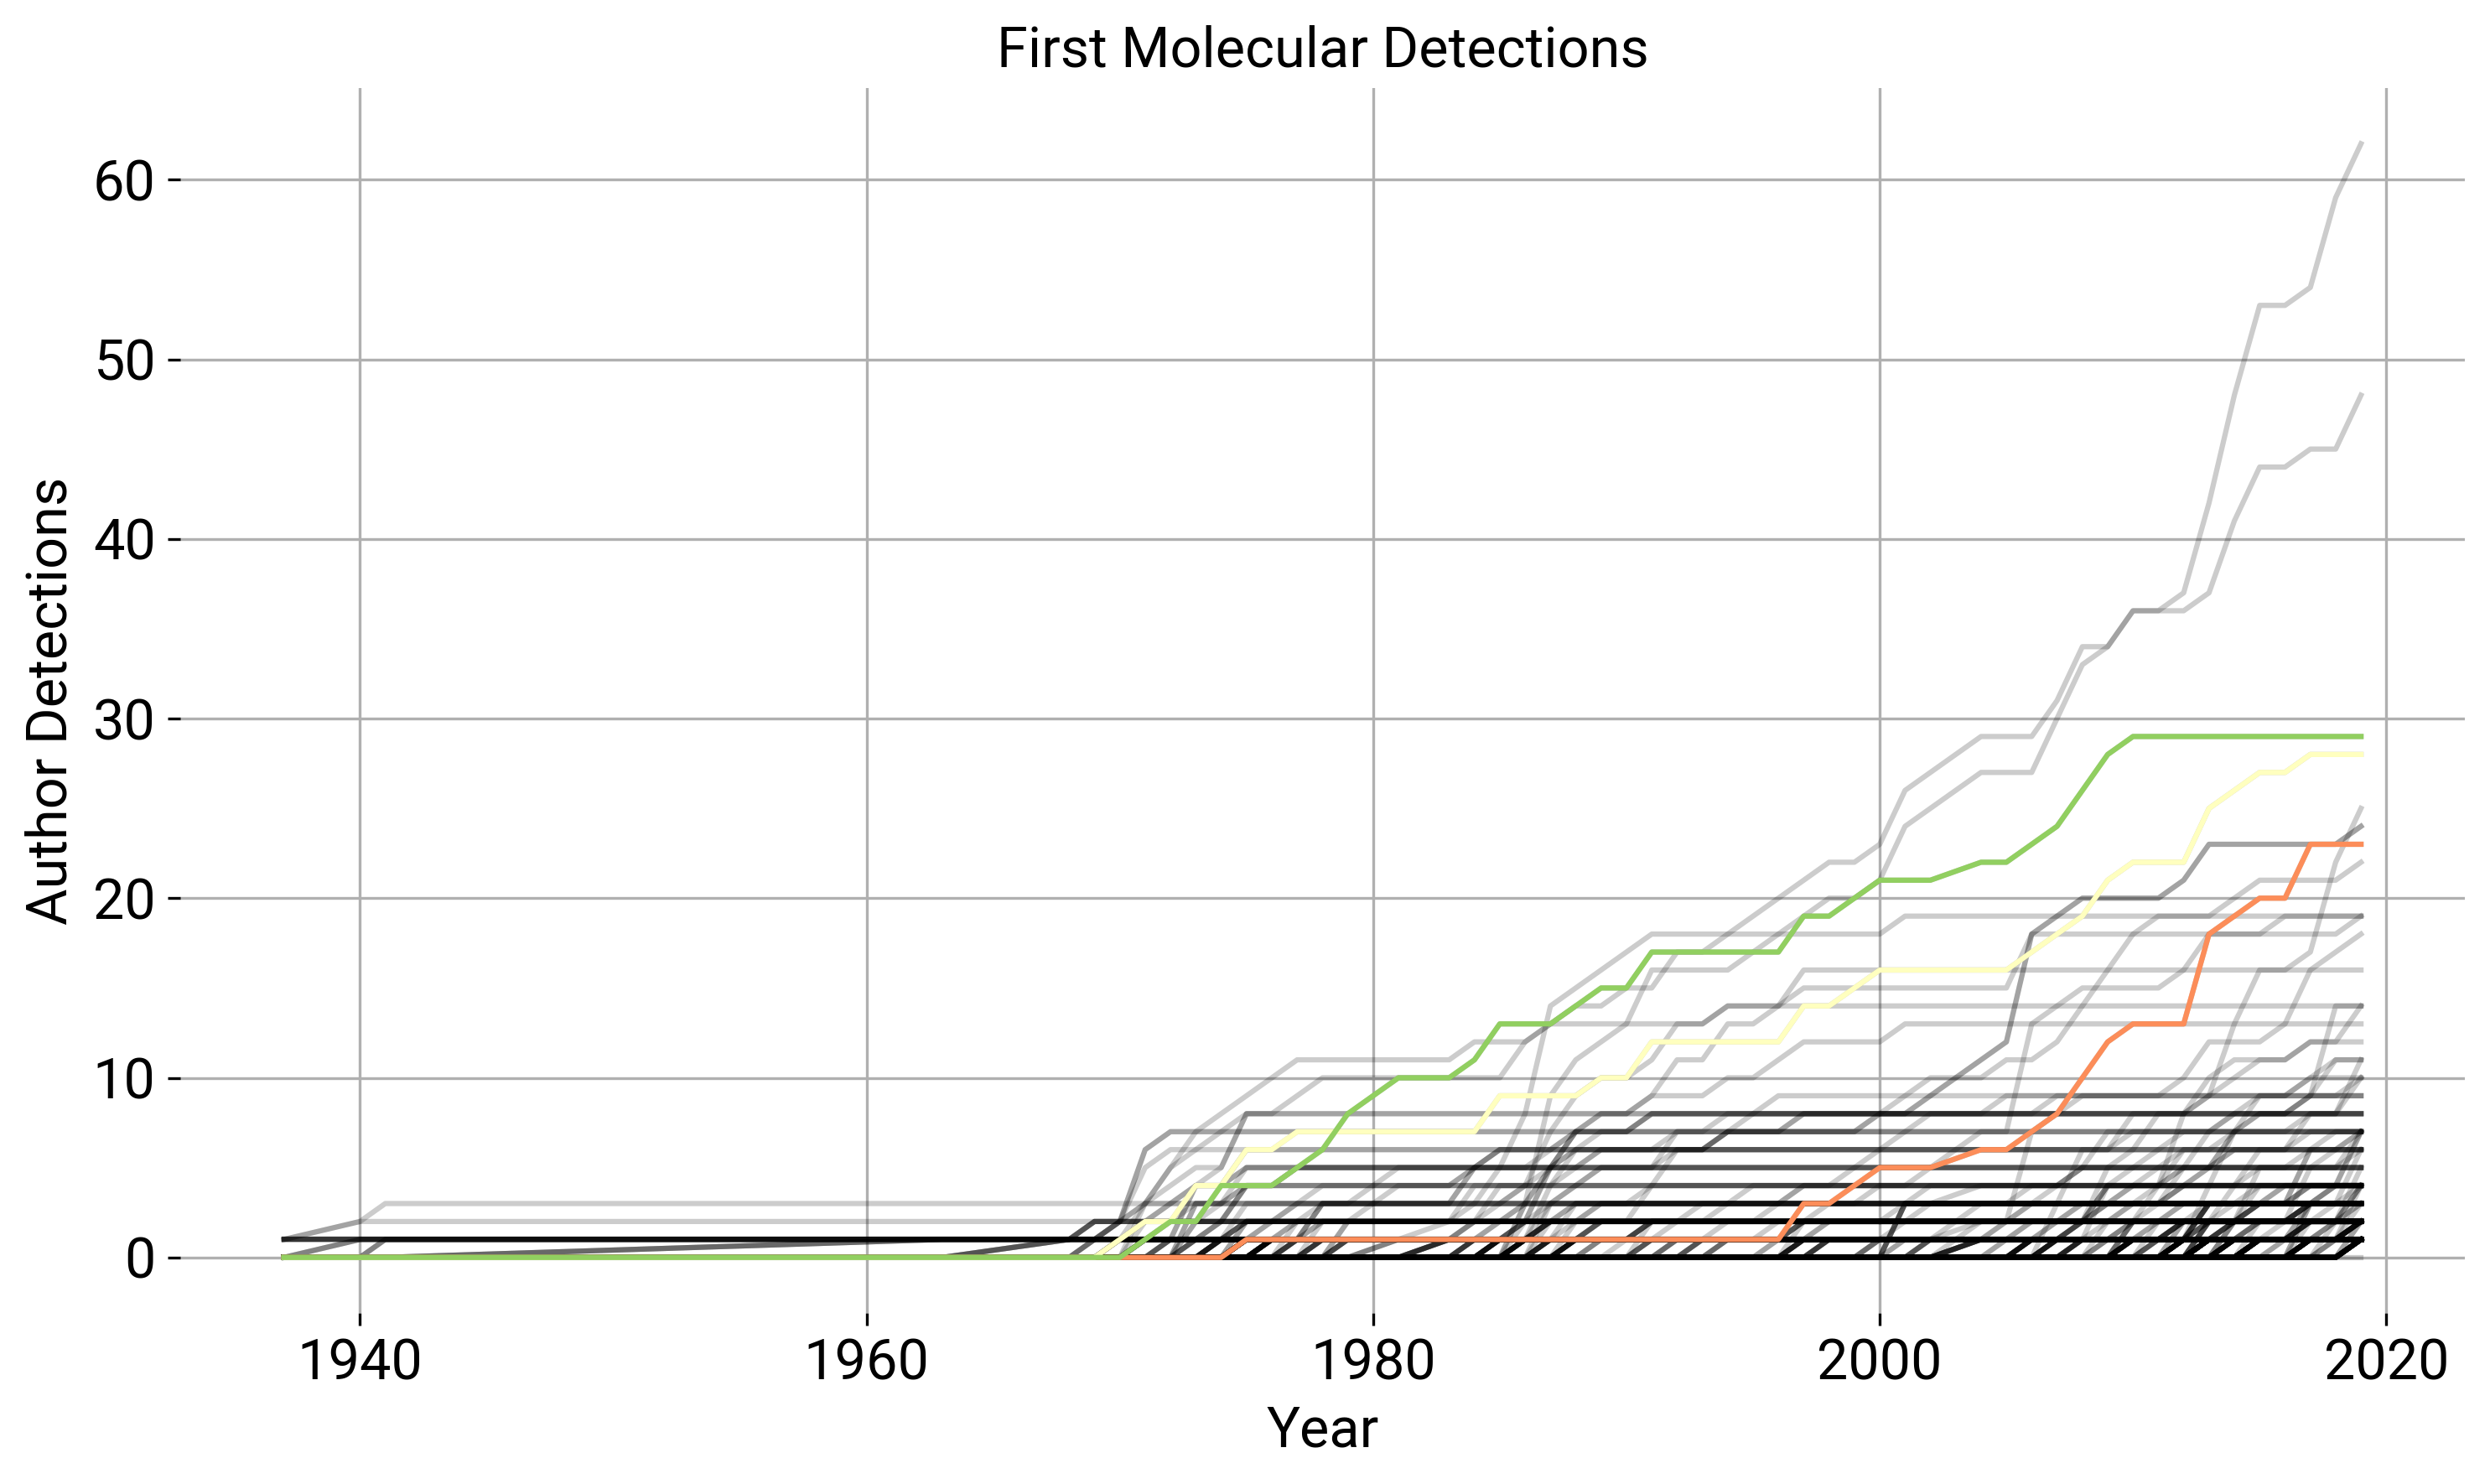

In [24]:
fig, ax = plt.subplots()

for author in tally:
    ax.plot(tally.index, tally[author], alpha=0.2, color="k")


ax.plot(
    tally.index, tally["C McCarthy"], label="Mike McCarthy", color="#fc8d59"
)

ax.plot(
    tally.index, tally["A Gottlieb"], label="Carl Gottlieb", color="#ffffbf"
)

ax.plot(
    tally.index, tally["P Thaddeus"], label="Pat Thaddeus", color="#91cf60"
)

ax.set_xlabel("Year")
ax.set_ylabel("Author Detections")
ax.set_title("First Molecular Detections")
for spine in ["top", "left", "bottom", "right"]:
    ax.spines[spine].set_visible(False)

ax.grid(True)
    
fig.tight_layout()
# fig.savefig("author-detections.png", dpi=300, format="png", transparent=True)
